In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.preprocessing import StandardScaler
import sklearn.manifold as manifold
import seaborn as sns

## KMeans with World Happiness Dataset

In [2]:
filename = 'World_Happiness_2017.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
df.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [5]:
df.shape

(155, 12)

In [6]:
df2 = df[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']]

In [7]:
df2.head()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
df2.shape

(155, 8)

In [9]:
ss = StandardScaler()
ss.fit_transform(df2)

array([[ 1.93599602,  1.50618765,  1.20357658, ...,  0.8569643 ,
         1.90308437,  0.85629599],
       [ 1.92269283,  1.18651768,  1.26503623, ...,  0.80685634,
         2.73999784,  0.92989102],
       [ 1.90672969,  1.1823454 ,  1.47266877, ...,  1.70201314,
         0.30006609,  0.94796425],
       ..., 
       [-1.77816933, -1.12910094, -0.51306362, ...,  0.79923322,
        -0.56334657, -2.4660431 ],
       [-2.17193469, -2.12929212, -1.95262416, ..., -0.31596505,
        -0.38459935, -0.33549229],
       [-2.35994869, -2.34773594, -4.15212515, ...,  0.253028  ,
        -0.65680192,  0.43290816]])

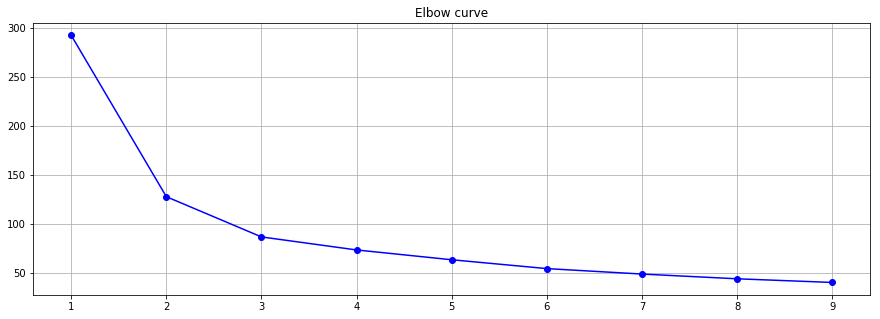

In [10]:
distortions = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    distortions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15,5))
plt.plot(range(1,10), distortions, 'bo-')
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
z = kmeans.cluster_centers_

In [13]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

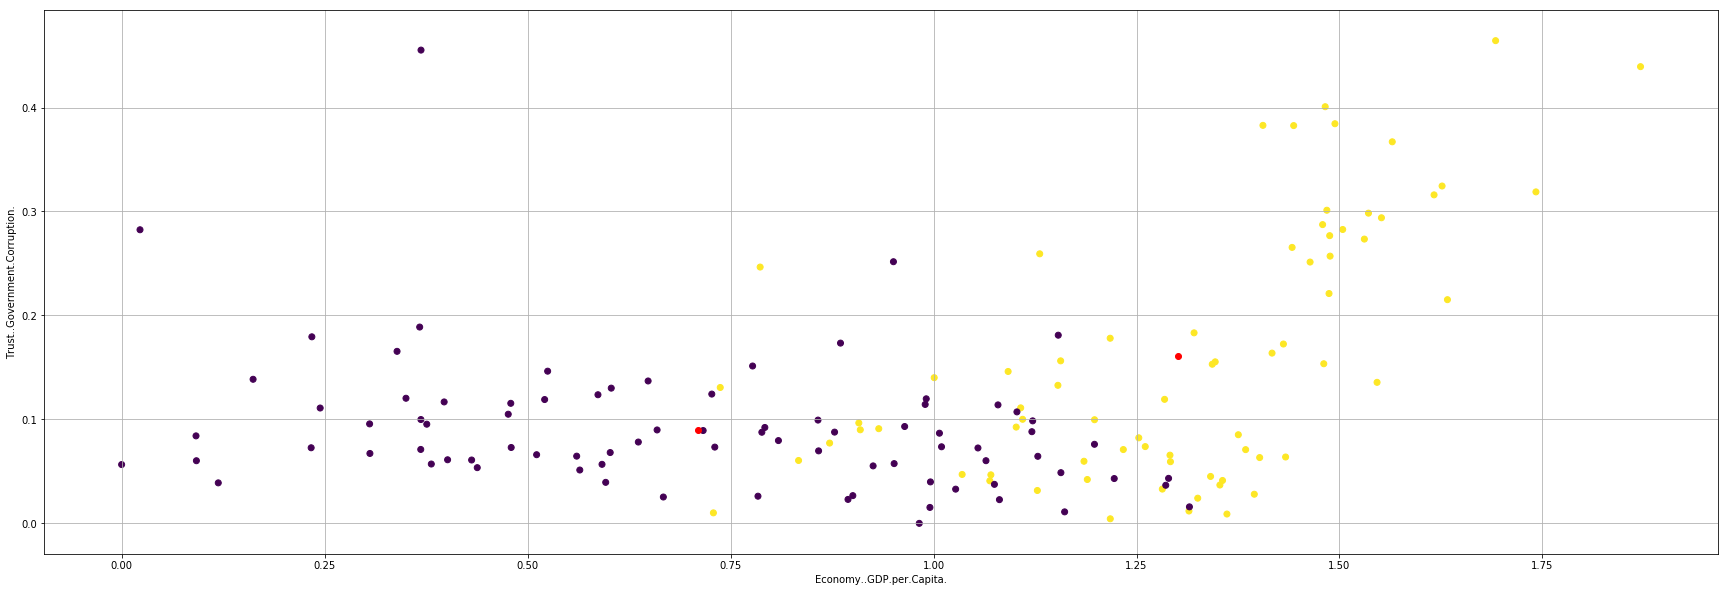

In [14]:
plt.figure(figsize=(30,10))
plt.grid(True)
plt.scatter(x = 'Economy..GDP.per.Capita.' ,y = 'Trust..Government.Corruption.' , data = df2, c = kmeans.labels_)
plt.scatter(x = z[:,1], y =z[:,6], c='red')
plt.xlabel("Economy..GDP.per.Capita.")
plt.ylabel("Trust..Government.Corruption.")
plt.show()

## DBScan

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


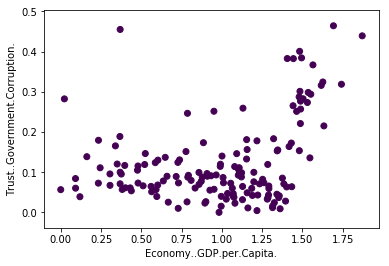

In [15]:
clf = DBSCAN(eps=3, min_samples=5)
clf.fit(df2)
print(clf.labels_)

plt.scatter(x = 'Economy..GDP.per.Capita.' ,y = 'Trust..Government.Corruption.' , data = df2,c=clf.labels_)
plt.xlabel("Economy..GDP.per.Capita.")
plt.ylabel("Trust..Government.Corruption.")
plt.show()

## HDBScan

In [16]:
model = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
model_labels = model.fit_predict(df2)

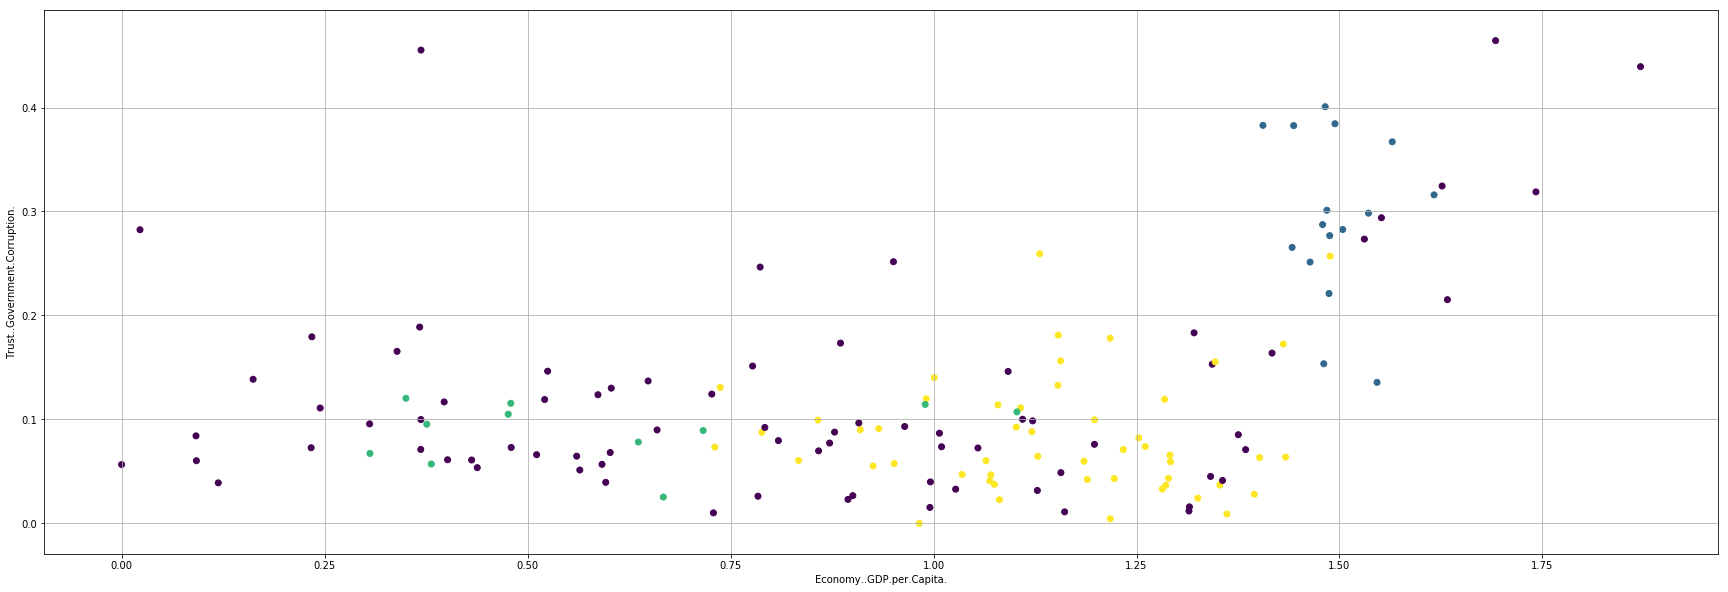

In [17]:
plt.figure(figsize=(30,10))
plt.grid(True)
plt.scatter(x = 'Economy..GDP.per.Capita.' ,y = 'Trust..Government.Corruption.' , data = df2, c = model_labels)
plt.xlabel("Economy..GDP.per.Capita.")
plt.ylabel("Trust..Government.Corruption.")
plt.show()

In [18]:
model_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
       -1,  0,  2, -1,  2,  2,  2,  2, -1, -1,  2, -1,  2,  2, -1,  2, -1,
       -1,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2, -1, -1,
       -1, -1,  2,  2, -1,  2,  2,  2,  2,  2, -1,  2,  2, -1, -1,  2,  2,
        2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1,  2,  2, -1,  2,
        2,  2,  2, -1,  2,  2,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1])

In [19]:
manifold_method = manifold.TSNE(n_components=2)
projections = manifold_method.fit_transform(df2)

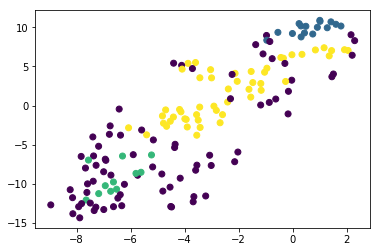

In [20]:
plt.scatter(projections[:,0], projections[:,1], c = model_labels)
plt.show()

In [21]:
df['clusters'] = model_labels

In [22]:
df['clusters'].value_counts()

-1    77
 2    51
 0    16
 1    11
Name: clusters, dtype: int64

## Exercise

Output the countries for each cluster

## Agglomerative Clustering

In [23]:
modelAC = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
clust_labels1 = modelAC.fit_predict(df2)

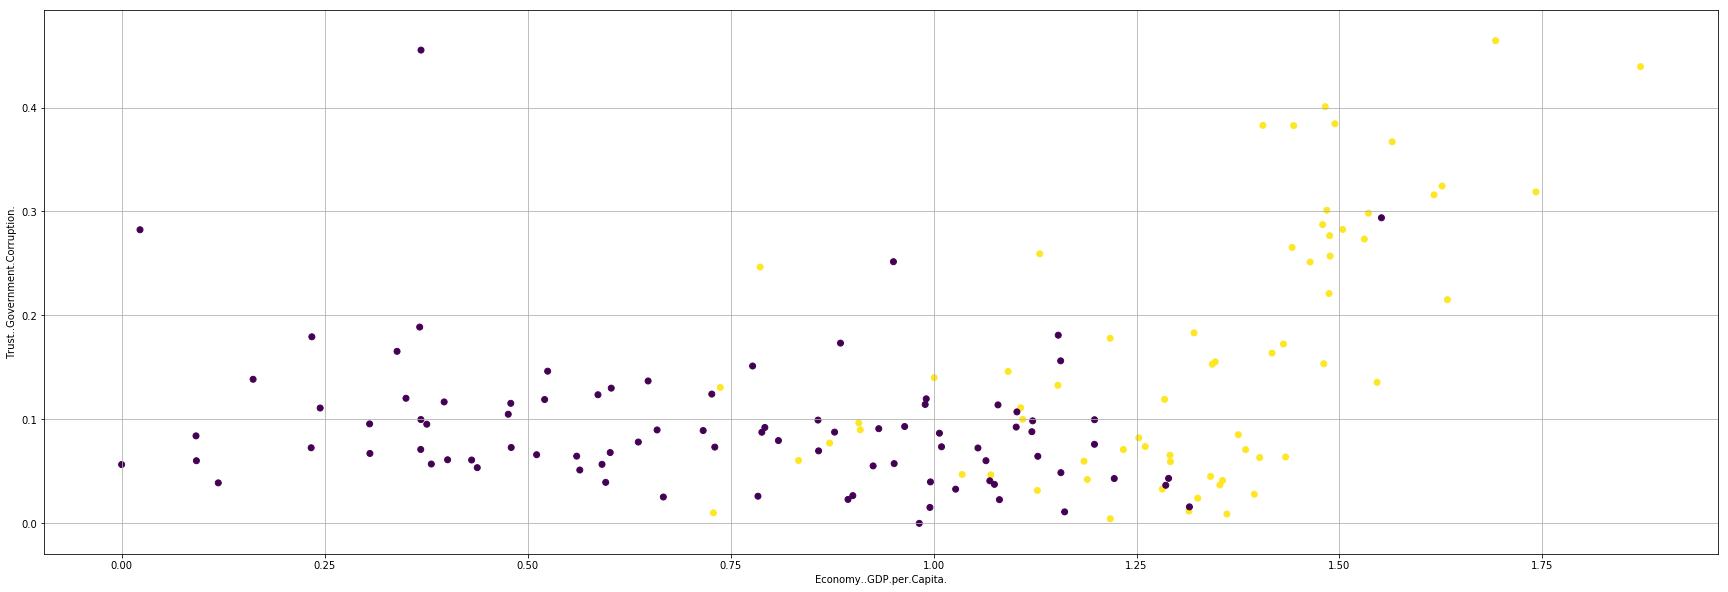

In [24]:
plt.figure(figsize=(30,10))
plt.grid(True)
plt.scatter(x = 'Economy..GDP.per.Capita.' ,y = 'Trust..Government.Corruption.' , data = df2, c = clust_labels1)
plt.xlabel("Economy..GDP.per.Capita.")
plt.ylabel("Trust..Government.Corruption.")
plt.show()

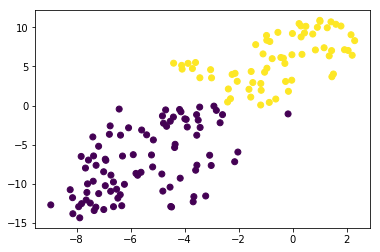

In [25]:
plt.scatter(projections[:,0], projections[:,1], c = clust_labels1)
plt.show()

## Exercise

Plot TSNE graphs for KMeans and DBScan to compare